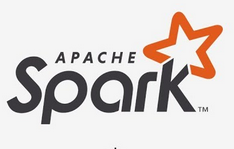

# Spark Data Frame Basics


DataFrames are the distributed collections of data, organized into rows and columns. Each column in a DataFrame has a name and an associated type. DataFrames are similar to traditional database tables, which are structured and concise



# Contents:

1.  Creating a dataframe
2.  Showing the data
3.  Creating new columns
4.  Spark SQL
5.  Importing CSV files using Infer_schema
6.  Filter




In [1]:
!pip install pyspark;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=96464ea6e1d31a6dc21ddd4ad52997e1365c893fe89444f49eec0917d0b41b3c
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

Pyspark Basic operations

In [3]:
# Starting the spark session

spark = SparkSession.builder.appName("Basics of spark").getOrCreate()

1. Creating the Dataframe:

-> here we load 2 different files i.e CSV and JSON


   

In [4]:
#df1 = spark.read.csv("sales_info.csv")
df2 = spark.read.json("people.json")

2. Showing the data


In [5]:
df2.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [8]:
df2.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [9]:
df2.columns

['age', 'name']

In [10]:
df2.describe()

DataFrame[summary: string, age: string, name: string]

Some data types make it easier to infer schema (like tabular formats such as csv which we will show later).

However you often have to set the schema yourself if you aren't dealing with a .read method that doesn't have inferSchema() built-in.

Spark has all the tools you need for this, it just requires a very specific structure:

In [12]:
from pyspark.sql.types import StructField,StringType,IntegerType,StructType

Next we need to create the list of Structure fields(
    * :1st 'param name': string, name of the field.
    * :2nd 'param dataType': :class:`DataType` of the field.
    * :3rd 'param nullable': boolean, whether the field can be null (None) or not).

In [29]:
data_schema = [StructField('age',IntegerType(),True),StructField('name', StringType(),True)]

In [30]:
final_stru_schema = StructType(fields=data_schema)

df = spark.read.json('people.json', schema=final_stru_schema)




In [17]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- name: string (nullable = true)



In [18]:
df['age']

Column<'age'>

In [19]:
df.select('age')

DataFrame[age: int]

In [31]:
df.select('age').show()

+----+
| age|
+----+
|null|
|  30|
|  19|
+----+



In [21]:
#returns first 2 rows of the data set

df.head(2)



[Row(Age=None, name='Michael'), Row(Age=None, name='Andy')]

In [32]:
#selecting multiple column

df.select(['age','name']).show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



3. Creating the new columns

In [33]:
# Adding a new column with a simple copy

df.withColumn('newage',df['age']).show()

+----+-------+------+
| age|   name|newage|
+----+-------+------+
|null|Michael|  null|
|  30|   Andy|    30|
|  19| Justin|    19|
+----+-------+------+



In [34]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [37]:
#Simple Rename function

df.withColumnRenamed('age','new_age').show()

+-------+-------+
|new_age|   name|
+-------+-------+
|   null|Michael|
|     30|   Andy|
|     19| Justin|
+-------+-------+



In [39]:
# complicated operations on new columns


df.withColumn('new_col',df['age']+12).show()

df.withColumn('new_col',df['age']*12).show()

df.withColumn('new_col',df['age']-12).show()

df.withColumn('new_col',df['age']/12).show()

+----+-------+-------+
| age|   name|new_col|
+----+-------+-------+
|null|Michael|   null|
|  30|   Andy|     42|
|  19| Justin|     31|
+----+-------+-------+

+----+-------+-------+
| age|   name|new_col|
+----+-------+-------+
|null|Michael|   null|
|  30|   Andy|    360|
|  19| Justin|    228|
+----+-------+-------+

+----+-------+-------+
| age|   name|new_col|
+----+-------+-------+
|null|Michael|   null|
|  30|   Andy|     18|
|  19| Justin|      7|
+----+-------+-------+

+----+-------+------------------+
| age|   name|           new_col|
+----+-------+------------------+
|null|Michael|              null|
|  30|   Andy|               2.5|
|  19| Justin|1.5833333333333333|
+----+-------+------------------+



3. SparkSQL

To use SQL queries directly with the dataframe, you will need to register it to a temporary view:

In [42]:
df.createOrReplaceTempView("people")

In [45]:
spark.sql("select * from people").show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [47]:
spark.sql("select * from people where age >20").show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [48]:
spark

In [49]:
spark  = SparkSession.builder.appName("basic_operation1").getOrCreate();

In [50]:
spark

In [9]:
df = spark.read.csv('appl_stock.csv',inferSchema=True,header = True)

In [10]:
df.head()

Row(Date=datetime.date(2010, 1, 4), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039)

In [11]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [15]:
df.take(3) # it will return first 3 rows



[Row(Date=datetime.date(2010, 1, 4), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039),
 Row(Date=datetime.date(2010, 1, 5), Open=214.599998, High=215.589994, Low=213.249994, Close=214.379993, Volume=150476200, Adj Close=27.774976000000002),
 Row(Date=datetime.date(2010, 1, 6), Open=214.379993, High=215.23, Low=210.750004, Close=210.969995, Volume=138040000, Adj Close=27.333178000000004)]

In [17]:
df.tail(3) # it will return the last 3 rows

[Row(Date=datetime.date(2016, 12, 28), Open=117.519997, High=118.019997, Low=116.199997, Close=116.760002, Volume=20905900, Adj Close=116.25596499999999),
 Row(Date=datetime.date(2016, 12, 29), Open=116.449997, High=117.110001, Low=116.400002, Close=116.730003, Volume=15039500, Adj Close=116.226096),
 Row(Date=datetime.date(2016, 12, 30), Open=116.650002, High=117.199997, Low=115.43, Close=115.82, Volume=30586300, Adj Close=115.32002)]

In [18]:
df.show() # returns only the top 20 rows which is similar to the df.head() in python

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [19]:
df.limit(10).show() #similar to df.head(10)


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

Filtering the data set using the filter statement , based on some logical operations

In [22]:
df.filter(df['Close']>200).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [26]:
# If we want a particular columns then we can use select statement similar to SQL


df.filter(df['Close']>200).select('Open').show()

+------------------+
|              Open|
+------------------+
|        213.429998|
|        214.599998|
|        214.379993|
|            211.75|
|        210.299994|
|212.79999700000002|
|209.18999499999998|
|        207.870005|
|210.11000299999998|
|210.92999500000002|
|        208.330002|
|        214.910006|
|        212.079994|
|202.51000200000001|
|205.95000100000001|
|        206.849995|
|        198.109995|
|        201.940002|
|        204.190001|
|        201.629995|
+------------------+
only showing top 20 rows



In [28]:
df.filter(df['Close']>200).select(['Open','Close']).show()

+------------------+------------------+
|              Open|             Close|
+------------------+------------------+
|        213.429998|        214.009998|
|        214.599998|        214.379993|
|        214.379993|        210.969995|
|            211.75|            210.58|
|        210.299994|211.98000499999998|
|212.79999700000002|210.11000299999998|
|209.18999499999998|        207.720001|
|        207.870005|        210.650002|
|210.11000299999998|            209.43|
|210.92999500000002|            205.93|
|        208.330002|        215.039995|
|        214.910006|            211.73|
|        212.079994|        208.069996|
|202.51000200000001|        203.070002|
|205.95000100000001|        205.940001|
|        206.849995|        207.880005|
|        198.109995|200.37999299999998|
|        201.940002|        203.399996|
|        204.190001|        202.550003|
|        201.629995|        202.929998|
+------------------+------------------+
only showing top 20 rows



In [29]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [31]:
df.filter(df['High']<df['Low']).show()

+----+----+----+---+-----+------+---------+
|Date|Open|High|Low|Close|Volume|Adj Close|
+----+----+----+---+-----+------+---------+
+----+----+----+---+-----+------+---------+



In [34]:
# we Can apply logical condition to filter the data using &, | operators

df.filter((df['CLose']>200) & (df['Open']>200)).show()



#Note : Make sure to use the brackets to sperate the conditions




+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [35]:
df.filter((df['CLose']>200) | (df['Open']>200)).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [36]:
df.filter(df['Close']== 210.58).show()

+----------+------+----------+----------+------+---------+---------+
|      Date|  Open|      High|       Low| Close|   Volume|Adj Close|
+----------+------+----------+----------+------+---------+---------+
|2010-01-07|211.75|212.000006|209.050005|210.58|119282800| 27.28265|
+----------+------+----------+----------+------+---------+---------+



In [37]:
df.filter(df['Close']== 210.58).collect()

[Row(Date=datetime.date(2010, 1, 7), Open=211.75, High=212.000006, Low=209.050005, Close=210.58, Volume=119282800, Adj Close=27.28265)]

In [38]:
a = df.filter(df['Close']== 210.58).collect()

In [47]:
type(a)

list

In [43]:
type(a[0])

#Note the type of a is different then the a[0]

pyspark.sql.types.Row

In [45]:
a1 = a[0]

In [46]:
# here it will convert the a[0] to dict

a1.asDict()

{'Date': datetime.date(2010, 1, 7),
 'Open': 211.75,
 'High': 212.000006,
 'Low': 209.050005,
 'Close': 210.58,
 'Volume': 119282800,
 'Adj Close': 27.28265}